In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

In [ ]:
# Cargamos los datos
file_path = '/content/Transporte_Publico_Espana.csv'
data = pd.read_csv(file_path)

# Vemos las priemras filas para entender su estructura
data.head()

,ID_Viaje,Fecha,Ruta,Numero_Pasajeros,Duracion_Viaje_Minutos,Retraso_Minutos,Tipo_Transporte,Region,Dia_Semana
0,1,2023-01-01 00:00:00,Barcelona - Bilbao,NaN,not_available,999,Tranvía,Sevilla,Sunday
1,2,2023-01-01 00:01:00,Malaga - Sevilla,99.0,192.0,58,Tren,Barcelona,Sunday
2,3,2023-01-01 00:02:00,Madrid - Zaragoza,10.0,94.0,119,Autobús,Madrid,Sunday
3,4,2023-01-01 00:03:00,Sevilla - Madrid,96.0,650.0,2,Metro,Malaga,Sunday
4,5,2023-01-01 00:04:00,Madrid - Malaga,22.0,335.0,51,Autobús,Sevilla,Sunday


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100100 entries, 0 to 100099
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID_Viaje                100100 non-null  int64  
 1   Fecha                   100100 non-null  object 
 2   Ruta                    100100 non-null  object 
 3   Numero_Pasajeros        99099 non-null   float64
 4   Duracion_Viaje_Minutos  99767 non-null   object 
 5   Retraso_Minutos         100100 non-null  int64  
 6   Tipo_Transporte         100100 non-null  object 
 7   Region                  100100 non-null  object 
 8   Dia_Semana              100100 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 6.9+ MB


# Paso 1: Revisión de duplicados

In [ ]:
# Verificando duplicados
duplicados = data.duplicated().sum()
duplicados

100

In [ ]:
# Eliminando los duplicados
data_sin_duplicados = data.drop_duplicates()

In [ ]:
# Verificando cuántos duplicados quedan después de la eliminación
duplicados_finales = data_sin_duplicados.duplicated().sum()
print(f"Duplicados finales: {duplicados_finales}")

Duplicados finales: 0


In [ ]:
data_sin_duplicados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID_Viaje                100000 non-null  int64  
 1   Fecha                   100000 non-null  object 
 2   Ruta                    100000 non-null  object 
 3   Numero_Pasajeros        99000 non-null   float64
 4   Duracion_Viaje_Minutos  99667 non-null   object 
 5   Retraso_Minutos         100000 non-null  int64  
 6   Tipo_Transporte         100000 non-null  object 
 7   Region                  100000 non-null  object 
 8   Dia_Semana              100000 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 7.6+ MB


# Paso 2: Revisión de tipos de datos y datos faltantes

In [ ]:
# tipos de datos
tipos_de_datos = data.dtypes
tipos_de_datos

ID_Viaje                    int64
Fecha                      object
Ruta                       object
Numero_Pasajeros          float64
Duracion_Viaje_Minutos     object
Retraso_Minutos             int64
Tipo_Transporte            object
Region                     object
Dia_Semana                 object
dtype: object

In [ ]:
# Verificando valores faltantes
valores_faltantes = data.isnull().sum()
valores_faltantes

ID_Viaje                     0
Fecha                        0
Ruta                         0
Numero_Pasajeros          1001
Duracion_Viaje_Minutos     333
Retraso_Minutos              0
Tipo_Transporte              0
Region                       0
Dia_Semana                   0
dtype: int64

In [ ]:
# Asegurando que la columna Duracion_Viaje_Minutos sea de tipo float
data_sin_duplicados.loc[:,'Duracion_Viaje_Minutos'] = pd.to_numeric(data_sin_duplicados['Duracion_Viaje_Minutos'], errors='coerce')

In [ ]:
# Calculando la mediana de las columnas con valores faltantes
mediana_numero_pasajeros = data_sin_duplicados['Numero_Pasajeros'].median()
mediana_duracion_viaje_minutos = data_sin_duplicados['Duracion_Viaje_Minutos'].median()

In [ ]:
# Rellenando los valores faltantes con la mediana
data_sin_duplicados.loc[:, 'Numero_Pasajeros'] = data_sin_duplicados['Numero_Pasajeros'].fillna(mediana_numero_pasajeros)
data_sin_duplicados.loc[:, 'Duracion_Viaje_Minutos'] = data_sin_duplicados['Duracion_Viaje_Minutos'].fillna(mediana_duracion_viaje_minutos)

In [ ]:
# Convertir la columna Numero_Pasajeros a tipo int
data_sin_duplicados.loc[:,'Numero_Pasajeros'] = data_sin_duplicados['Numero_Pasajeros'].astype(int)

In [ ]:
# Verificar que no haya valores faltantes
valores_faltantes_despues = data_sin_duplicados.isnull().sum()
print(valores_faltantes_despues)

ID_Viaje                  0
Fecha                     0
Ruta                      0
Numero_Pasajeros          0
Duracion_Viaje_Minutos    0
Retraso_Minutos           0
Tipo_Transporte           0
Region                    0
Dia_Semana                0
dtype: int64


In [ ]:
# Convertiendo fecha a datetime
data_sin_duplicados.loc[:,'Fecha'] = pd.to_datetime(data_sin_duplicados['Fecha'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
data_sin_duplicados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   ID_Viaje                100000 non-null  int64         
 1   Fecha                   100000 non-null  datetime64[ns]
 2   Ruta                    100000 non-null  object        
 3   Numero_Pasajeros        100000 non-null  int64         
 4   Duracion_Viaje_Minutos  100000 non-null  float64       
 5   Retraso_Minutos         100000 non-null  int64         
 6   Tipo_Transporte         100000 non-null  object        
 7   Region                  100000 non-null  object        
 8   Dia_Semana              100000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 7.6+ MB


# Paso 3: Filtramos Tipo de Transporte Inviables

In [ ]:
# Filtrando los tipos de transporte inviables ('Tranvía' y 'Metro')
transportes_inviables = ['Tranvía', 'Metro']
data_filtrada = data_sin_duplicados[~data_sin_duplicados['Tipo_Transporte'].isin(transportes_inviables)]

# Mostrando un resumen de los datos filtrados para verificar
resumen_transporte = data_filtrada['Tipo_Transporte'].value_counts()
print(resumen_transporte)

Tipo_Transporte
Autobús    25050
Tren       24954
Name: count, dtype: int64


In [ ]:
# Mostrando una muestra de los datos filtrados para verificar
print(data_filtrada.head())

    ID_Viaje               Fecha                Ruta  Numero_Pasajeros  \
1          2 2023-01-01 00:01:00    Malaga - Sevilla                99   
2          3 2023-01-01 00:02:00   Madrid - Zaragoza                10   
4          5 2023-01-01 00:04:00     Madrid - Malaga                22   
6          7 2023-01-01 00:06:00     Madrid - Malaga                78   
10        11 2023-01-01 00:10:00  Valencia - Sevilla                67   

    Duracion_Viaje_Minutos  Retraso_Minutos Tipo_Transporte     Region  \
1                    192.0               58            Tren  Barcelona   
2                     94.0              119         Autobús     Madrid   
4                    335.0               51         Autobús    Sevilla   
6                    608.0               21         Autobús     Malaga   
10                   345.0                2         Autobús    Sevilla   

   Dia_Semana  
1      Sunday  
2      Sunday  
4      Sunday  
6      Sunday  
10     Sunday  


# Paso 4: Transformar Tipo_Transporte y Dia_semana a numérico

In [ ]:
# Eliminando espacios en blanco
data_filtrada.loc[:,'Tipo_Transporte'] = data_filtrada['Tipo_Transporte'].str.strip()
data_filtrada.loc[:,'Dia_Semana'] = data_filtrada['Dia_Semana'].str.strip()

In [ ]:
# Transformando Tipo_Transporte a numérico
data_filtrada.loc[:,'Tipo_Transporte'] = data_filtrada.Tipo_Transporte.map({'Tren': 1, 'Autobús': 2})

In [ ]:
# Transformando Dia_Semana a numérico
data_filtrada.loc[:,'Dia_Semana'] = data_filtrada.Dia_Semana.map({'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6})

In [ ]:
data_filtrada.head()

,ID_Viaje,Fecha,Ruta,Numero_Pasajeros,Duracion_Viaje_Minutos,Retraso_Minutos,Tipo_Transporte,Region,Dia_Semana
1,2,2023-01-01 00:01:00,Malaga - Sevilla,99,192.0,58,1,Barcelona,6
2,3,2023-01-01 00:02:00,Madrid - Zaragoza,10,94.0,119,2,Madrid,6
4,5,2023-01-01 00:04:00,Madrid - Malaga,22,335.0,51,2,Sevilla,6
6,7,2023-01-01 00:06:00,Madrid - Malaga,78,608.0,21,2,Malaga,6
10,11,2023-01-01 00:10:00,Valencia - Sevilla,67,345.0,2,2,Sevilla,6


In [ ]:
data_filtrada.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50004 entries, 1 to 99997
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID_Viaje                50004 non-null  int64         
 1   Fecha                   50004 non-null  datetime64[ns]
 2   Ruta                    50004 non-null  object        
 3   Numero_Pasajeros        50004 non-null  int64         
 4   Duracion_Viaje_Minutos  50004 non-null  float64       
 5   Retraso_Minutos         50004 non-null  int64         
 6   Tipo_Transporte         50004 non-null  object        
 7   Region                  50004 non-null  object        
 8   Dia_Semana              50004 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 4.8+ MB


In [ ]:
# Convertir la columna Tip_Transporte a tipo int
data_filtrada.loc[:,'Tipo_Transporte'] = data_filtrada['Tipo_Transporte'].astype(int)

In [ ]:
# Convertir la columna Dia_Semana a tipo int
data_filtrada.loc[:,'Dia_Semana'] = data_filtrada['Dia_Semana'].astype(int)

# EDA VARIABLES CATEGÓRICAS

In [ ]:
def graficos_eda_categoricos(cat):

    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)  # ceil redondea hacia arriba y  y cat.shape[1] devuelve el
                                    # número de columnas en el DataFramme 'cat'.

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat

    #Creamos el bucle que va añadiendo gráficos
    for index, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[index])
        ax[index].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[index].tick_params(labelsize = 12)

In [ ]:
# # Seleccionando columnas categóricas
cat_data_filtrada = data_filtrada.select_dtypes('O')

### Opción para que tome en cuenta tanto las columnas tipo object como las categóricas
# cat_columns = data_filtrada.select_dtypes(include=['object', 'category']).columns
# cat_data_filtrada = data_filtrada[cat_columns]

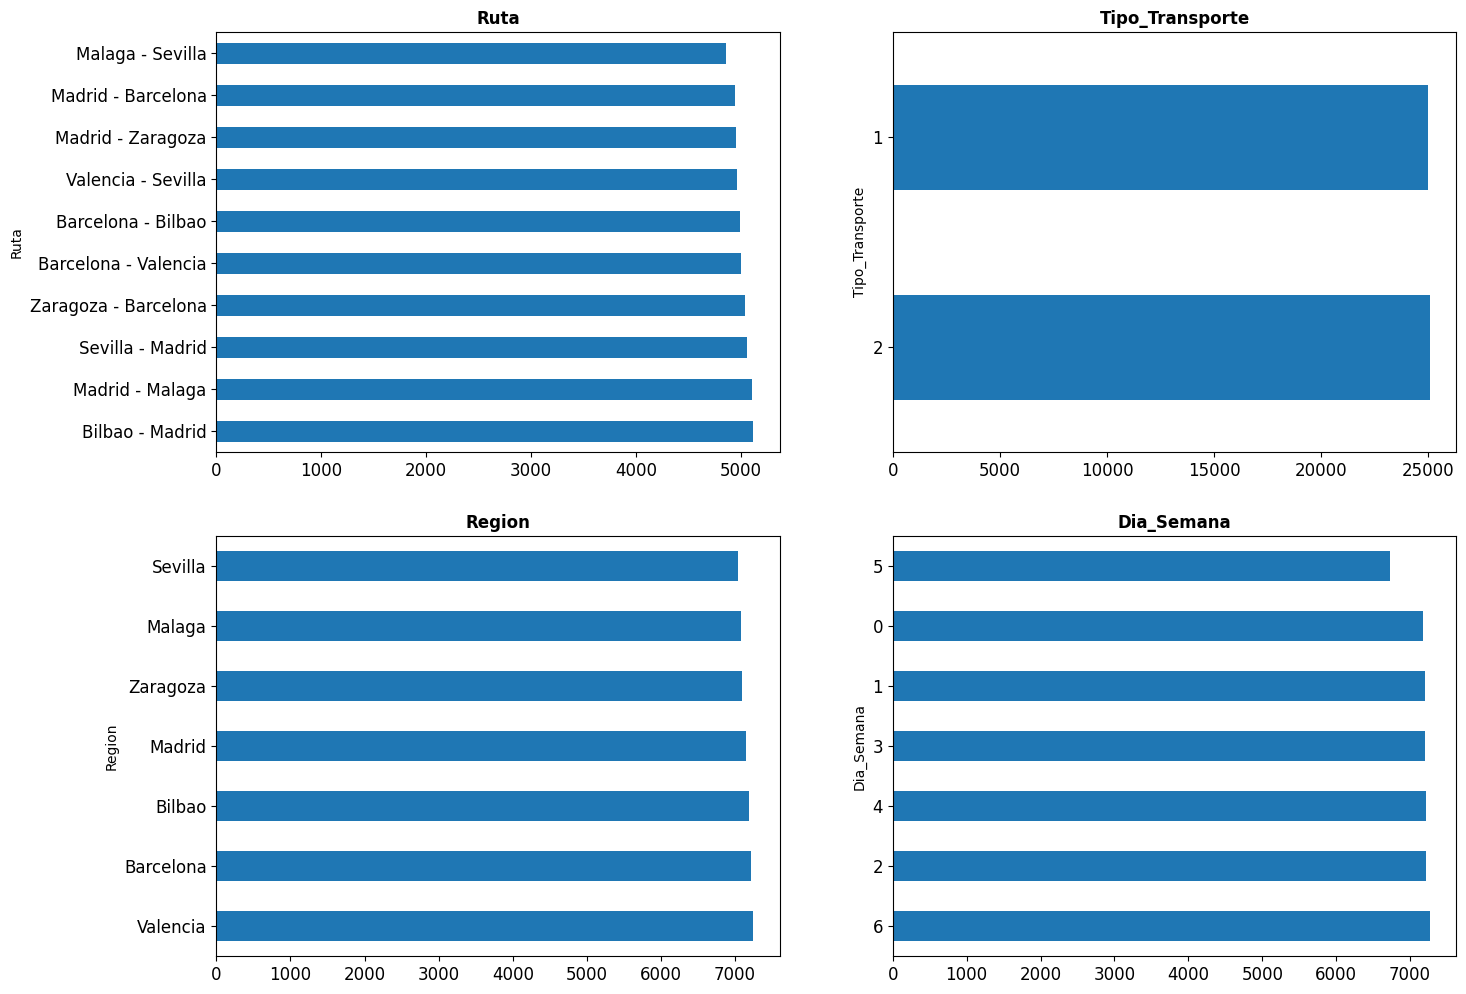

In [ ]:
# Aplicando la función
graficos_eda_categoricos(cat_data_filtrada)

# EDA VARIABLES NUMÉRICAS

In [ ]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [ ]:
estadisticos_cont(data_filtrada.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
ID_Viaje,50004.0,49823.529078,49730.5,28920.145191,2.0,24797.75,49730.5,74903.5,99998.0
Numero_Pasajeros,50004.0,54.455344,54.0,25.752128,10.0,32.00,54.0,77.0,99.0
Duracion_Viaje_Minutos,50004.0,367.473762,367.0,202.311434,15.0,193.00,367.0,541.0,719.0
Retraso_Minutos,50004.0,63.694904,59.0,73.116654,0.0,29.00,59.0,90.0,999.0
Tipo_Transporte,50004.0,1.500960,2.0,0.500004,1.0,1.00,2.0,2.0,2.0
Dia_Semana,50004.0,2.986421,3.0,2.000539,0.0,1.00,3.0,5.0,6.0


# Graficamos Boxplot

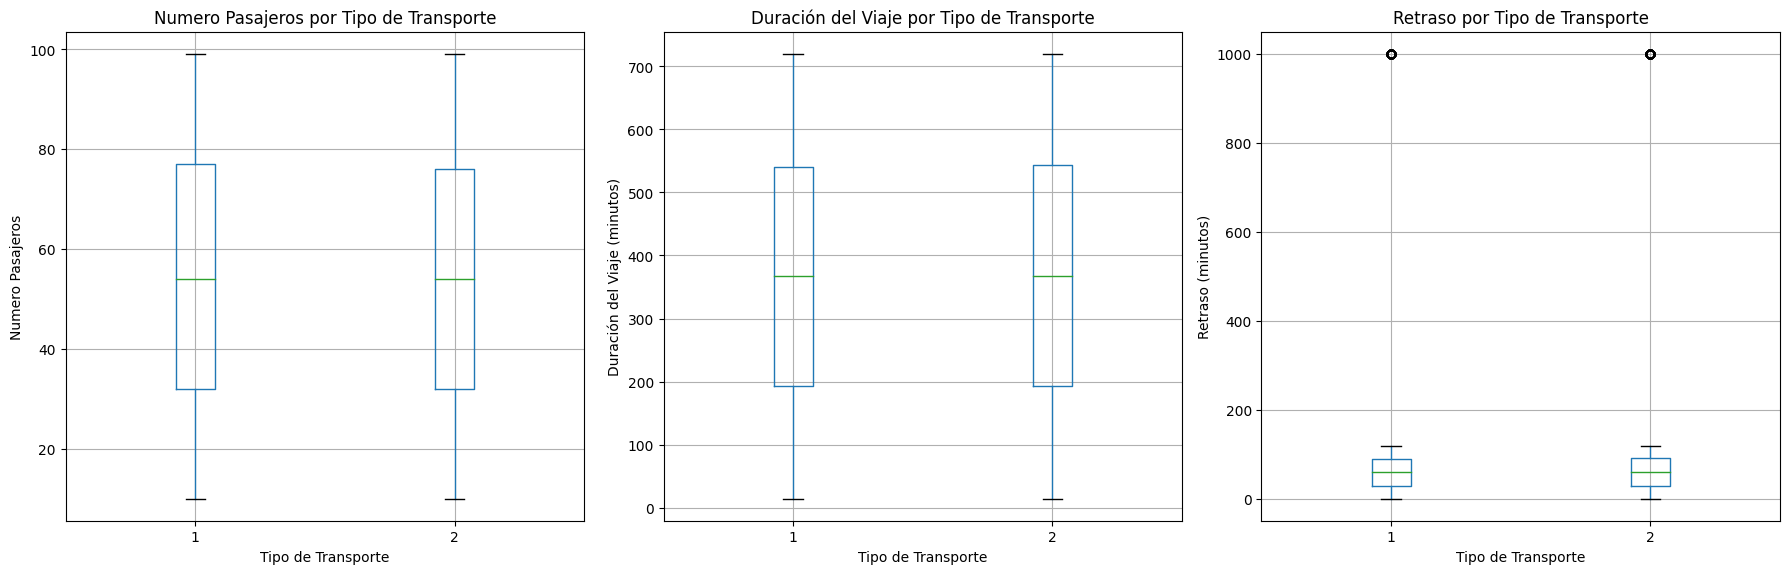

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Boxplot para Numero_Pasajeros
data_filtrada.boxplot(column='Numero_Pasajeros', by='Tipo_Transporte', ax=axes[0])
axes[0].set_title('Numero Pasajeros por Tipo de Transporte')
axes[0].set_xlabel('Tipo de Transporte')
axes[0].set_ylabel('Numero Pasajeros')

# Boxplot para Duracion_Viaje_Minutos
data_filtrada.boxplot(column='Duracion_Viaje_Minutos', by='Tipo_Transporte', ax=axes[1])
axes[1].set_title('Duración del Viaje por Tipo de Transporte')
axes[1].set_xlabel('Tipo de Transporte')
axes[1].set_ylabel('Duración del Viaje (minutos)')

# Boxplot para Retraso_Minutos
data_filtrada.boxplot(column='Retraso_Minutos', by='Tipo_Transporte', ax=axes[2])
axes[2].set_title('Retraso por Tipo de Transporte')
axes[2].set_xlabel('Tipo de Transporte')
axes[2].set_ylabel('Retraso (minutos)')

plt.suptitle('')
plt.tight_layout()
plt.show()

# Analizamos outliers de Tipo_Transporte

In [ ]:
# Filtrar las filas donde Retraso_Minutos es 999
outliers = data_filtrada[data_filtrada['Retraso_Minutos'] == 999]

# Mostrar una muestra de los outliers
print(outliers.head())

      ID_Viaje               Fecha                  Ruta  Numero_Pasajeros  \
800        801 2023-01-01 13:20:00       Bilbao - Madrid                54   
1000      1001 2023-01-01 16:40:00  Barcelona - Valencia                54   
1200      1201 2023-01-01 20:00:00  Barcelona - Valencia                54   
1400      1401 2023-01-01 23:20:00    Barcelona - Bilbao                54   
1600      1601 2023-01-02 02:40:00    Valencia - Sevilla                54   

      Duracion_Viaje_Minutos  Retraso_Minutos  Tipo_Transporte    Region  \
800                    209.0              999                2    Madrid   
1000                   686.0              999                2    Malaga   
1200                   367.0              999                2    Malaga   
1400                   562.0              999                2  Valencia   
1600                   133.0              999                1    Madrid   

      Dia_Semana  
800            6  
1000           6  
1200           6 

In [ ]:
# Contamos el número de outliers por Tipo_Transporte
outliers_por_tipo = outliers.groupby('Tipo_Transporte').size()

# Mostrar el conteo de outliers por Tipo_Transporte
print(outliers_por_tipo)

Tipo_Transporte
1    113
2    123
dtype: int64


In [ ]:
# Agrupamos por Tipo_Transporte y Ruta para ver las rutas correspondientes
outliers_rutas = outliers.groupby(['Tipo_Transporte', 'Ruta']).size().reset_index(name='count')

# Mostrar las rutas correspondientes con el número de outliers
print(outliers_rutas)

    Tipo_Transporte                  Ruta  count
0                 1    Barcelona - Bilbao     13
1                 1  Barcelona - Valencia      5
2                 1       Bilbao - Madrid     12
3                 1    Madrid - Barcelona      8
4                 1       Madrid - Malaga     14
5                 1     Madrid - Zaragoza     17
6                 1      Malaga - Sevilla      9
7                 1      Sevilla - Madrid      6
8                 1    Valencia - Sevilla     16
9                 1  Zaragoza - Barcelona     13
10                2    Barcelona - Bilbao     13
11                2  Barcelona - Valencia     19
12                2       Bilbao - Madrid     18
13                2    Madrid - Barcelona      8
14                2       Madrid - Malaga     11
15                2     Madrid - Zaragoza     10
16                2      Malaga - Sevilla      7
17                2      Sevilla - Madrid     12
18                2    Valencia - Sevilla     11
19                2 

In [ ]:
# Filtramos retrasos anormalmente altos (999 minutos)
data_filtrada = data_filtrada[data_filtrada['Retraso_Minutos'] < 999]

print("Datos después del filtrado:")
# Mostramos una muestra de los datos filtrados
print(data_filtrada.head())

Datos después del filtrado:
    ID_Viaje               Fecha                Ruta  Numero_Pasajeros  \
1          2 2023-01-01 00:01:00    Malaga - Sevilla                99   
2          3 2023-01-01 00:02:00   Madrid - Zaragoza                10   
4          5 2023-01-01 00:04:00     Madrid - Malaga                22   
6          7 2023-01-01 00:06:00     Madrid - Malaga                78   
10        11 2023-01-01 00:10:00  Valencia - Sevilla                67   

    Duracion_Viaje_Minutos  Retraso_Minutos  Tipo_Transporte     Region  \
1                    192.0               58                1  Barcelona   
2                     94.0              119                2     Madrid   
4                    335.0               51                2    Sevilla   
6                    608.0               21                2     Malaga   
10                   345.0                2                2    Sevilla   

    Dia_Semana  
1            6  
2            6  
4            6  
6       

In [ ]:
estadisticos_cont(data_filtrada.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
ID_Viaje,50004.0,49823.529078,49730.5,28920.145191,2.0,24797.75,49730.5,74903.5,99998.0
Numero_Pasajeros,50004.0,54.455344,54.0,25.752128,10.0,32.00,54.0,77.0,99.0
Duracion_Viaje_Minutos,50004.0,367.473762,367.0,202.311434,15.0,193.00,367.0,541.0,719.0
Retraso_Minutos,50004.0,63.694904,59.0,73.116654,0.0,29.00,59.0,90.0,999.0
Tipo_Transporte,50004.0,1.500960,2.0,0.500004,1.0,1.00,2.0,2.0,2.0
Dia_Semana,50004.0,2.986421,3.0,2.000539,0.0,1.00,3.0,5.0,6.0


# Análisis para mejorar la Eficiencia del Transporte.

## Análisis de Correlación

In [ ]:
# Calcular la matriz de correlación para el DataFrame validado y limpiado
corr_data =data_filtrada.select_dtypes('number').corr()

# Mostrar la matriz de correlación
print("Matriz de correlación del DataFrame validado y limpiado:")
print(corr_data)

Matriz de correlación del DataFrame validado y limpiado:
                        ID_Viaje  Numero_Pasajeros  Duracion_Viaje_Minutos  \
ID_Viaje                1.000000         -0.003862                0.012832   
Numero_Pasajeros       -0.003862          1.000000               -0.003259   
Duracion_Viaje_Minutos  0.012832         -0.003259                1.000000   
Retraso_Minutos         0.008819         -0.000086                0.007977   
Tipo_Transporte        -0.003045         -0.002739                0.005199   
Dia_Semana              0.012083          0.003101               -0.010346   

                        Retraso_Minutos  Tipo_Transporte  Dia_Semana  
ID_Viaje                       0.008819        -0.003045    0.012083  
Numero_Pasajeros              -0.000086        -0.002739    0.003101  
Duracion_Viaje_Minutos         0.007977         0.005199   -0.010346  
Retraso_Minutos                1.000000         0.004167    0.001132  
Tipo_Transporte                0.004167  

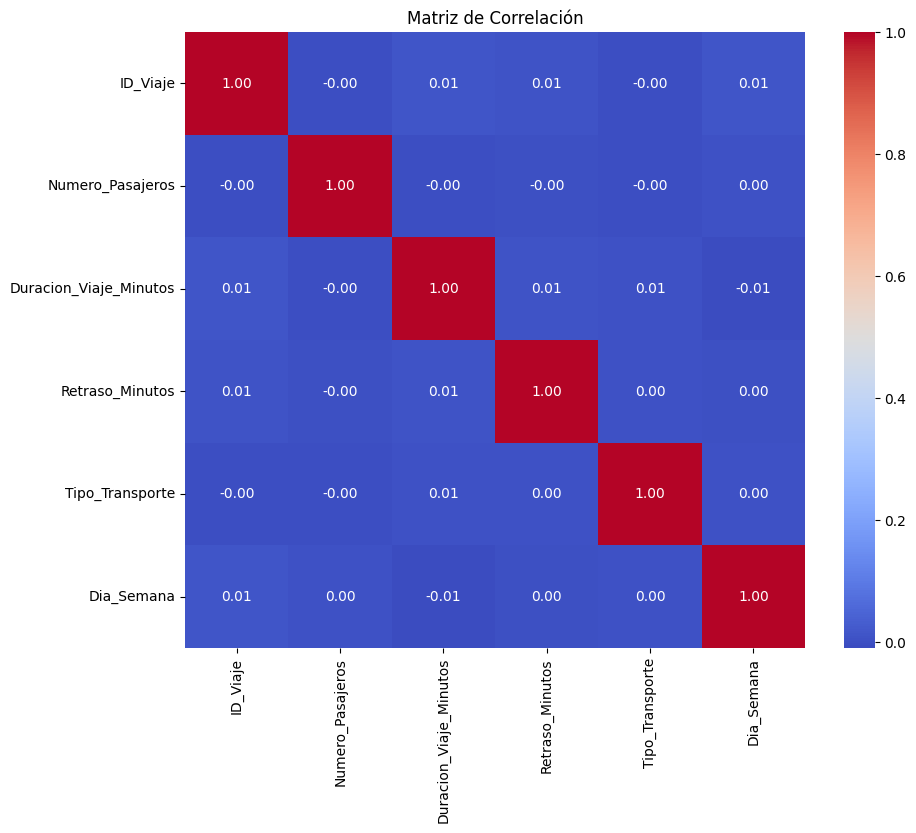

In [ ]:
# Visualizando la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

## Regresión

In [ ]:
import statsmodels.api as sm

# Definimos las variables dependiente e independientes
y = data_filtrada['Duracion_Viaje_Minutos']
X = data_filtrada[['Numero_Pasajeros', 'Retraso_Minutos', 'Tipo_Transporte', 'Dia_Semana']]
X = sm.add_constant(X)  # Añadir constante

# Ajustamos el modelo de regresión
model = sm.OLS(y, X).fit()

# Mostramos el resumen del modelo
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     Duracion_Viaje_Minutos   R-squared:                       0.000
Model:                                OLS   Adj. R-squared:                  0.000
Method:                     Least Squares   F-statistic:                     2.590
Date:                    Fri, 26 Jul 2024   Prob (F-statistic):             0.0348
Time:                            09:57:17   Log-Likelihood:            -3.3492e+05
No. Observations:                   49768   AIC:                         6.699e+05
Df Residuals:                       49763   BIC:                         6.699e+05
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------


In [ ]:
# Mostrar el resumen del modelo
summary_first = model.summary()
print(summary_first)

                              OLS Regression Results                              
Dep. Variable:     Duracion_Viaje_Minutos   R-squared:                       0.000
Model:                                OLS   Adj. R-squared:                  0.000
Method:                     Least Squares   F-statistic:                     2.590
Date:                    Fri, 26 Jul 2024   Prob (F-statistic):             0.0348
Time:                            09:57:55   Log-Likelihood:            -3.3492e+05
No. Observations:                   49768   AIC:                         6.699e+05
Df Residuals:                       49763   BIC:                         6.699e+05
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------


In [ ]:
# Guardar el resumen del modelo en un archivo de texto
with open('/content/model_summary_first.txt', 'w') as f:
    f.write(summary_first.as_text())

# Uso de Extracción de Caracterísitcas Temporales para Nuevo Análisis

In [ ]:
# Extraer características temporales
data_filtrada['Mes'] = data_filtrada['Fecha'].dt.month
data_filtrada['Día'] = data_filtrada['Fecha'].dt.day
data_filtrada['Hora'] = data_filtrada['Fecha'].dt.hour
data_filtrada['Minuto'] =data_filtrada['Fecha'].dt.minute
data_filtrada.drop(columns=['Fecha','ID_Viaje'], inplace=True)

In [ ]:
data_filtrada.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49768 entries, 1 to 99997
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ruta                    49768 non-null  object 
 1   Numero_Pasajeros        49768 non-null  int64  
 2   Duracion_Viaje_Minutos  49768 non-null  float64
 3   Retraso_Minutos         49768 non-null  int64  
 4   Tipo_Transporte         49768 non-null  int64  
 5   Region                  49768 non-null  object 
 6   Dia_Semana              49768 non-null  int64  
 7   Mes                     49768 non-null  int32  
 8   Día                     49768 non-null  int32  
 9   Hora                    49768 non-null  int32  
 10  Minuto                  49768 non-null  int32  
dtypes: float64(1), int32(4), int64(4), object(2)
memory usage: 3.8+ MB


In [ ]:
data_filtrada.head()

,Ruta,Numero_Pasajeros,Duracion_Viaje_Minutos,Retraso_Minutos,Tipo_Transporte,Region,Dia_Semana,Mes,Día,Hora,Minuto
1,Malaga - Sevilla,99,192.0,58,1,Barcelona,6,1,1,0,1
2,Madrid - Zaragoza,10,94.0,119,2,Madrid,6,1,1,0,2
4,Madrid - Malaga,22,335.0,51,2,Sevilla,6,1,1,0,4
6,Madrid - Malaga,78,608.0,21,2,Malaga,6,1,1,0,6
10,Valencia - Sevilla,67,345.0,2,2,Sevilla,6,1,1,0,10


In [ ]:
# Seleccionandi solo las columnas numéricas
data_numerica = data_filtrada.select_dtypes(include=['number'])

# Nuevo Análisis de Correlación

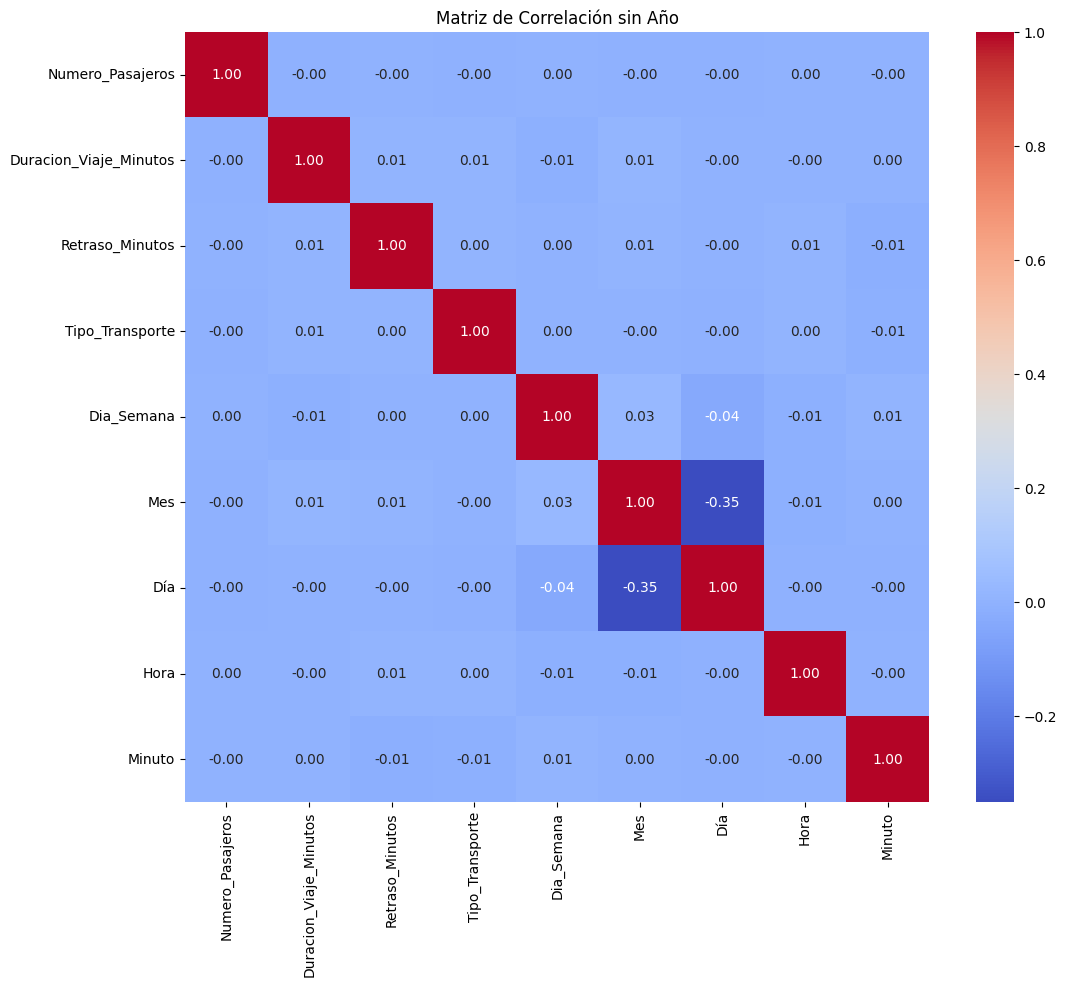

In [ ]:
# Calcular la matriz de correlación
correlacion = data_numerica.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación sin Año')
plt.show()

# Nuevo Análisis Regresión

In [ ]:
# Definimos las variables independiente (X) y dependiente (y)
# Eliminando variables no significativas basadas en los resultados anteriores
X = data_numerica[['Dia_Semana', 'Mes']]
y = data_numerica['Duracion_Viaje_Minutos']

In [ ]:
# Agregando constante (intercepto) al modelo
X = sm.add_constant(X)

# Ajustar el modelo de regresión
model_reduced = sm.OLS(y, X).fit()

# Mostrar el resumen del modelo
print(model_reduced.summary())

                              OLS Regression Results                              
Dep. Variable:     Duracion_Viaje_Minutos   R-squared:                       0.000
Model:                                OLS   Adj. R-squared:                  0.000
Method:                     Least Squares   F-statistic:                     6.681
Date:                    Fri, 26 Jul 2024   Prob (F-statistic):            0.00126
Time:                            10:09:19   Log-Likelihood:            -3.3492e+05
No. Observations:                   49768   AIC:                         6.698e+05
Df Residuals:                       49765   BIC:                         6.699e+05
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [ ]:
# Mostrando el resumen del modelo
summary = model_reduced.summary()
print(summary)

                              OLS Regression Results                              
Dep. Variable:     Duracion_Viaje_Minutos   R-squared:                       0.000
Model:                                OLS   Adj. R-squared:                  0.000
Method:                     Least Squares   F-statistic:                     6.681
Date:                    Fri, 26 Jul 2024   Prob (F-statistic):            0.00126
Time:                            10:10:04   Log-Likelihood:            -3.3492e+05
No. Observations:                   49768   AIC:                         6.698e+05
Df Residuals:                       49765   BIC:                         6.699e+05
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [ ]:
# Guardando el resumen del modelo en un archivo de texto
with open('/content/model_summary.txt', 'w') as f:
    f.write(summary.as_text())

# Análisis de Rutas
1. Agrupamos Datos
2. Calculamos Estadístias
3. Visualizamos los Resultados

In [ ]:
data_filtrada.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49768 entries, 1 to 99997
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ruta                    49768 non-null  object 
 1   Numero_Pasajeros        49768 non-null  int64  
 2   Duracion_Viaje_Minutos  49768 non-null  float64
 3   Retraso_Minutos         49768 non-null  int64  
 4   Tipo_Transporte         49768 non-null  int64  
 5   Region                  49768 non-null  object 
 6   Dia_Semana              49768 non-null  int64  
 7   Mes                     49768 non-null  int32  
 8   Día                     49768 non-null  int32  
 9   Hora                    49768 non-null  int32  
 10  Minuto                  49768 non-null  int32  
dtypes: float64(1), int32(4), int64(4), object(2)
memory usage: 3.8+ MB


In [ ]:
# Agrupando los datos por ruta
data_por_ruta = data_filtrada.groupby('Ruta').agg({
    'Duracion_Viaje_Minutos': ['mean', 'median', 'std'],
    'Retraso_Minutos': ['mean', 'median', 'std'],
    'Mes': 'mean',
    'Dia_Semana': 'mean'
}).reset_index()

In [ ]:
# Renombrando columnas para mayor claridad
data_por_ruta.columns = ['Ruta', 'Duracion_Mean', 'Duracion_Median', 'Duracion_Std',
                         'Retraso_Mean', 'Retraso_Median', 'Retraso_Std',
                         'Mes_Mean', 'Dia_Semana_Mean']

In [ ]:
# Mostrarndo el resumen de los datos por ruta
print(data_por_ruta)

                   Ruta  Duracion_Mean  Duracion_Median  Duracion_Std  \
0    Barcelona - Bilbao     369.867944            367.0    204.585018   
1  Barcelona - Valencia     366.396985            368.0    202.306014   
2       Bilbao - Madrid     368.130777            367.0    204.149429   
3    Madrid - Barcelona     370.692167            373.0    201.688139   
4       Madrid - Malaga     367.069067            366.0    199.581244   
5     Madrid - Zaragoza     365.404878            367.0    202.395620   
6      Malaga - Sevilla     365.908077            367.0    203.105977   
7      Sevilla - Madrid     362.015684            358.0    202.794093   
8    Valencia - Sevilla     369.790028            368.0    200.083951   
9  Zaragoza - Barcelona     370.177986            367.0    204.448450   

   Retraso_Mean  Retraso_Median  Retraso_Std  Mes_Mean  Dia_Semana_Mean  
0     59.057460            58.0    34.415374  1.710282         2.945565  
1     59.512965            60.0    34.735149  1.

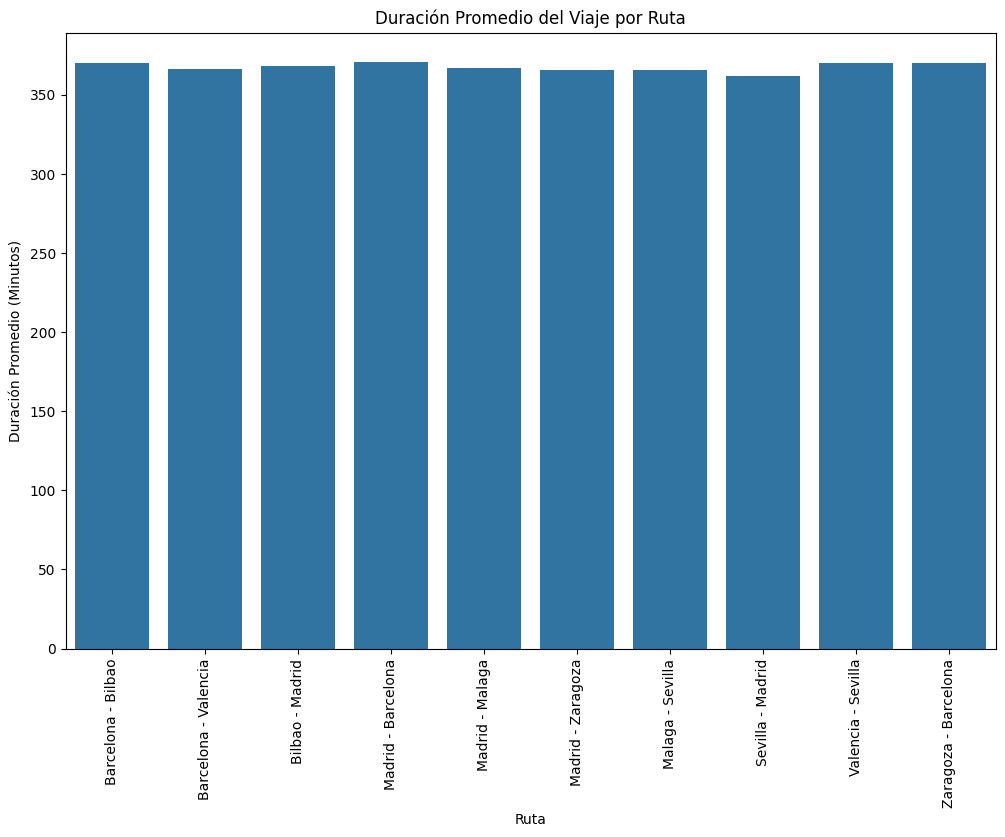

In [ ]:
# Gráfico de la duración del viaje por ruta
plt.figure(figsize=(12, 8))
sns.barplot(x='Ruta', y='Duracion_Mean', data=data_por_ruta)
plt.title('Duración Promedio del Viaje por Ruta')
plt.xticks(rotation=90)
plt.ylabel('Duración Promedio (Minutos)')
plt.xlabel('Ruta')
plt.show()

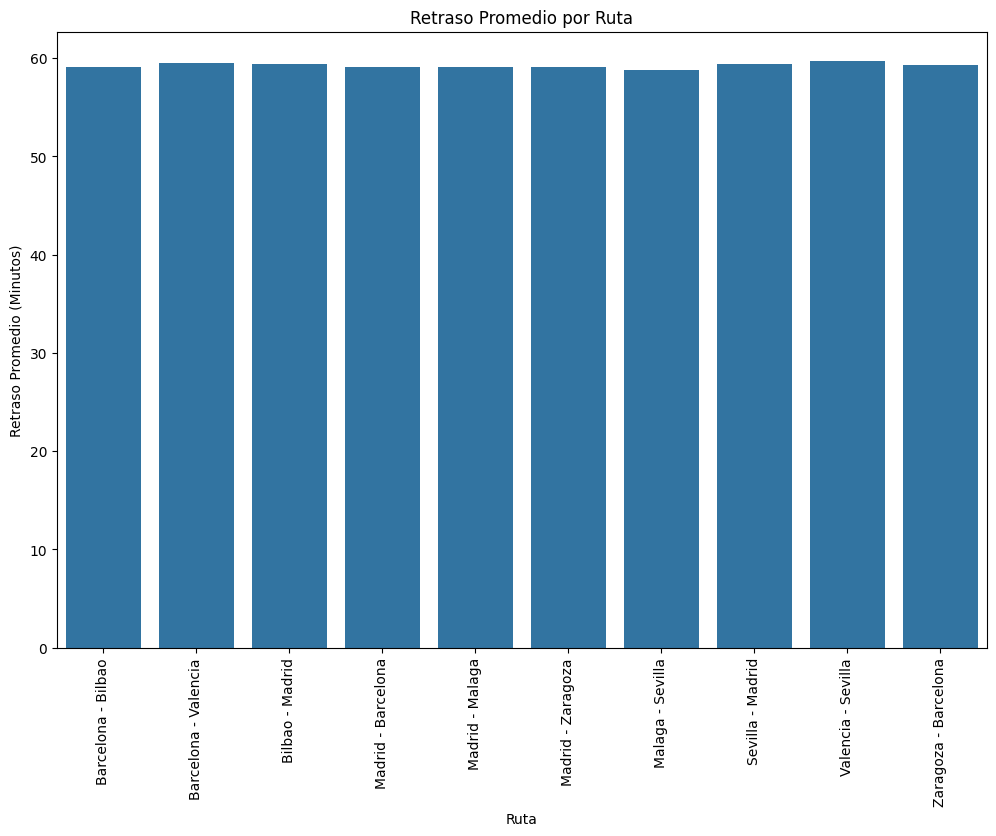

In [ ]:
# Gráfico del retraso por ruta
plt.figure(figsize=(12, 8))
sns.barplot(x='Ruta', y='Retraso_Mean', data=data_por_ruta)
plt.title('Retraso Promedio por Ruta')
plt.xticks(rotation=90)
plt.ylabel('Retraso Promedio (Minutos)')
plt.xlabel('Ruta')
plt.show()

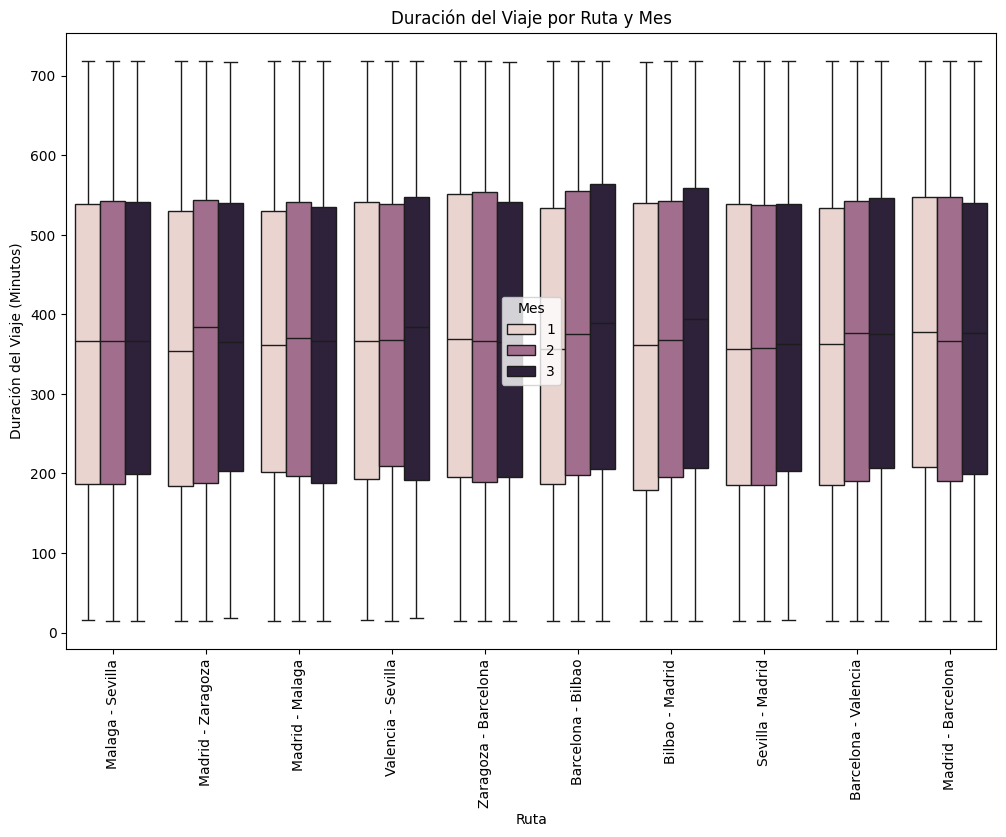

In [ ]:
# Gráfico duración del viaje por ruta considerando Mes
plt.figure(figsize=(12, 8))
sns.boxplot(x='Ruta', y='Duracion_Viaje_Minutos', hue='Mes', data=data_filtrada)
plt.title('Duración del Viaje por Ruta y Mes')
plt.xticks(rotation=90)
plt.ylabel('Duración del Viaje (Minutos)')
plt.xlabel('Ruta')
plt.legend(title='Mes')
plt.show()

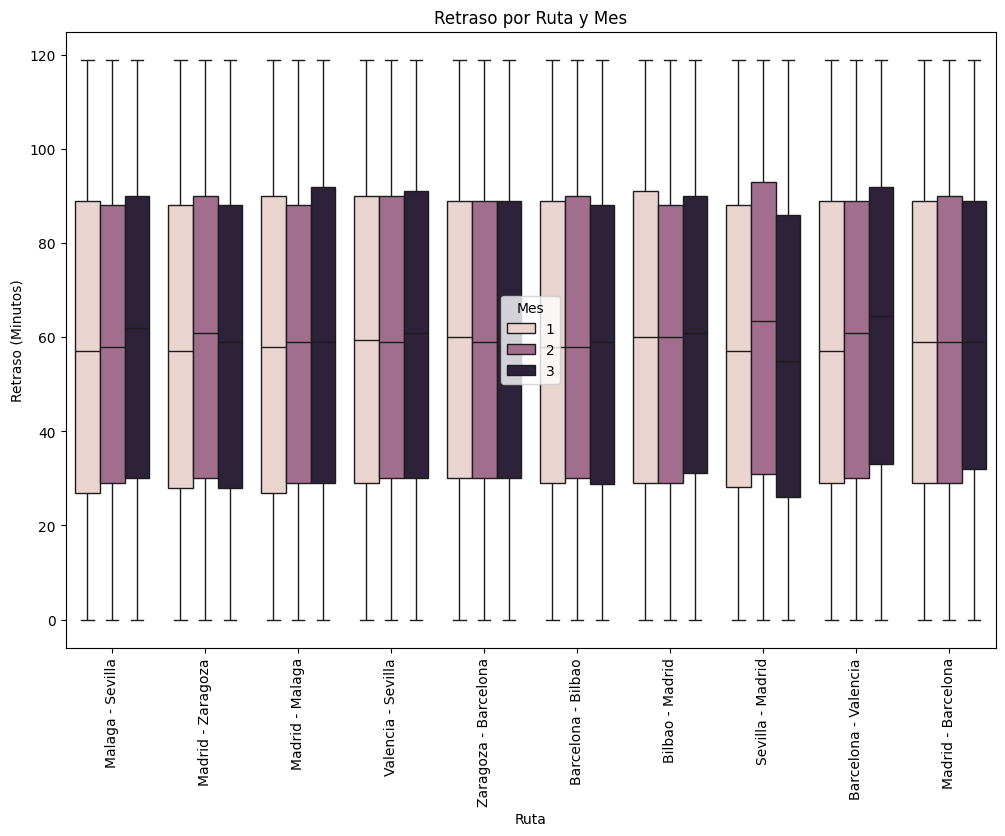

In [ ]:
# Gráfico Retraso por ruta considerando Mes
plt.figure(figsize=(12, 8))
sns.boxplot(x='Ruta', y='Retraso_Minutos', hue='Mes', data=data_filtrada)
plt.title('Retraso por Ruta y Mes')
plt.xticks(rotation=90)
plt.ylabel('Retraso (Minutos)')
plt.xlabel('Ruta')
plt.legend(title='Mes')
plt.show()

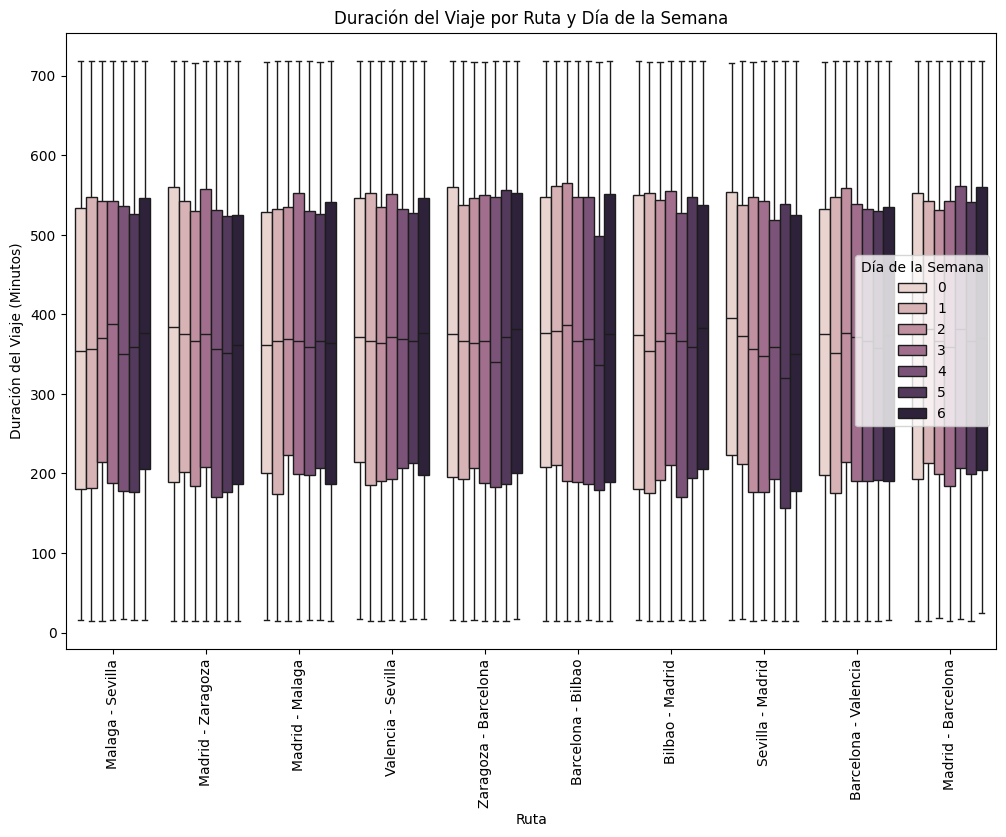

In [ ]:
# Gráfico duración del viaje por ruta considerando Dia_Semana
plt.figure(figsize=(12, 8))
sns.boxplot(x='Ruta', y='Duracion_Viaje_Minutos', hue='Dia_Semana', data=data_filtrada)
plt.title('Duración del Viaje por Ruta y Día de la Semana')
plt.xticks(rotation=90)
plt.ylabel('Duración del Viaje (Minutos)')
plt.xlabel('Ruta')
plt.legend(title='Día de la Semana')
plt.show()

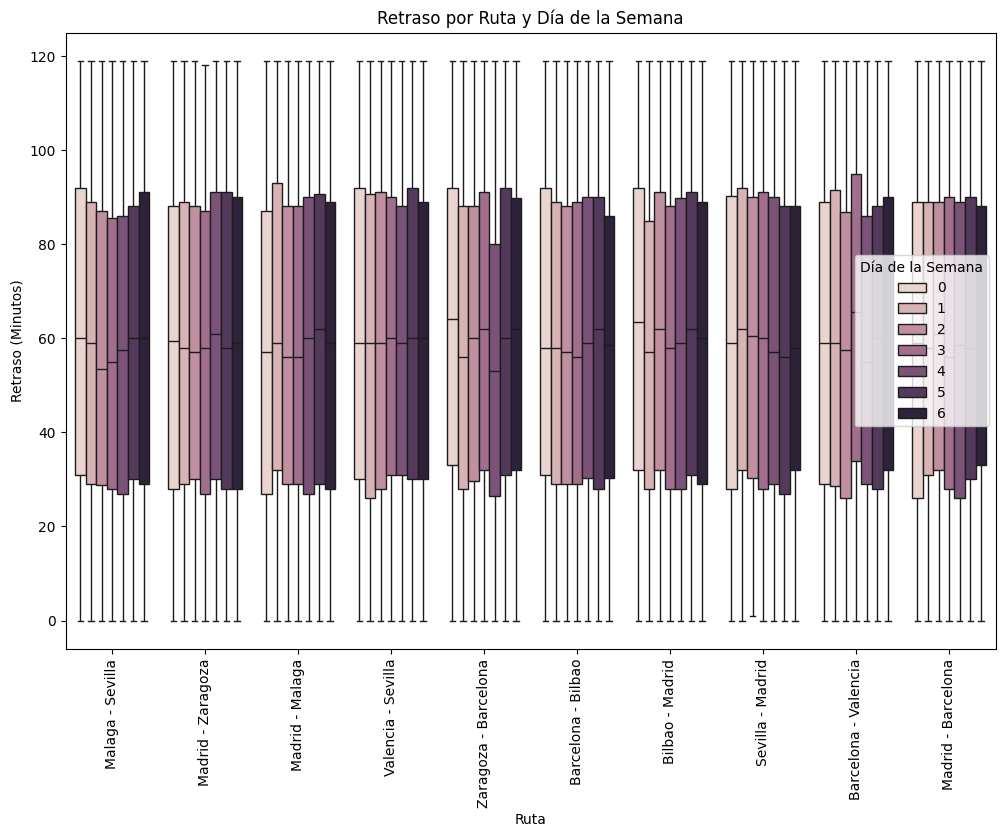

In [ ]:
# Gráfico Retraso por ruta considerando Dia_Semana
plt.figure(figsize=(12, 8))
sns.boxplot(x='Ruta', y='Retraso_Minutos', hue='Dia_Semana', data=data_filtrada)
plt.title('Retraso por Ruta y Día de la Semana')
plt.xticks(rotation=90)
plt.ylabel('Retraso (Minutos)')
plt.xlabel('Ruta')
plt.legend(title='Día de la Semana')
plt.show()

In [ ]:
# Reemplazar punto decimal por coma
data_filtrada['Duracion_Viaje_Minutos'] = data_filtrada['Duracion_Viaje_Minutos'].apply(lambda x: str(x).replace('.', ','))

In [ ]:
data_filtrada.head()

,Ruta,Numero_Pasajeros,Duracion_Viaje_Minutos,Retraso_Minutos,Tipo_Transporte,Region,Dia_Semana,Mes,Día,Hora,Minuto
1,Malaga - Sevilla,99,"192,0",58,1,Barcelona,6,1,1,0,1
2,Madrid - Zaragoza,10,"94,0",119,2,Madrid,6,1,1,0,2
4,Madrid - Malaga,22,"335,0",51,2,Sevilla,6,1,1,0,4
6,Madrid - Malaga,78,"608,0",21,2,Malaga,6,1,1,0,6
10,Valencia - Sevilla,67,"345,0",2,2,Sevilla,6,1,1,0,10


In [ ]:
# Guardando el DataFrame en un archivo CSV
file_path = '/content/data_transporte_final.csv'
data_filtrada.to_csv(file_path, index=False)